<h1 align="center">MSIN016: Data Engineering</h1>
<h2 align="center">Group Project</h2>
<h2 align="center">Creating Pipeline for NFT Relational Database</h2>
<h2 align="center">Word count: 4000</h2>
<br><br>
<h5 align="left"> Google Colab link for the Notebook file: https://colab.research.google.com/drive/1yo6bjulSOYRDjBFyKHF6IIyUW2oNPn0H?usp=sharing </h5>

# Table of Contents

* [Chapter 1](#chapter1): Data cleaning
    * [1.1](#1_1): Dataframe sorting
    * [1.2](#1_2): Dealing with outliers and missing values
    * [1.3](#1_3): Label encoding
    
* [Chapter 2](#chapter2): Preprocessing
    * [2.1](#2_1): Feature engineering
    * [2.2](#2_2): Feature scaling
    * [2.3](#2_3): Data splitting

* [Chapter 3](#chapter3): Model training
    * [3.1](#3_1): Model 1
    * [3.2](#3_2): Model 2
    * [3.3](#3_3): Model 3
    * [3.4](#3_4): Model 4
    * [3.5](#3_5): Model 5
    * [3.6](#3_6): Stacking
    * [3.7](#3_7): Voting classifier

* [Chapter 4](#chapter4): Pipeline

# Report

## Notebook setup

In [ ]:
#from google.colab import drive
#drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
#Essentials
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"
import pandas as pd
from pandas import Series, DataFrame
from pandas.api.types import CategoricalDtype
pd.options.display.max_columns = None
import numpy as np; np.random.seed(2022)
import random

#Image creation
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.ticker as mtick
import matplotlib.patches as mpatches
from matplotlib import pyplot
import plotly.express as px
import plotly.graph_objects as go

#Image display
from IPython.display import Image as image
from IPython.display import display

#Preprocessing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.compose import ColumnTransformer
from sklearn.compose import make_column_transformer
from sklearn.pipeline import Pipeline
from sklearn.pipeline import make_pipeline

#Models
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.svm import SVC
from sklearn import svm
from sklearn.naive_bayes import GaussianNB
from sklearn.base import clone
from sklearn.ensemble import StackingClassifier
from sklearn.ensemble import BaggingClassifier

#Metrics of accuracy
from sklearn import metrics
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import confusion_matrix
from sklearn.metrics import f1_score, precision_score, recall_score
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from numpy import mean
from numpy import std

#Other
from nbformat import current
import itertools as it
import io
import os
import sys

## Chapter 3: <a class="anchor" id="chapter3"></a> Transforming 1: Data cleaning

In [ ]:
df1 = pd.read_csv('dataset.csv') #local or Faculty
#df1 = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Data Engineering/Group Project/nft_showroom.csv') #Google Colab
df1 = df1.dropna(how='all', axis=1)
df1 = df1.dropna(how='all')
df1.head()

,title,name,creator,art_series,price,symbol,type,likes,nsfw,tokens,year,rights,royalty,cid,path
0,30 min Drawings,Giant Frog,kristyglas,kristyglas_30-min-drawings_giant-frog,50.0,SWAP.HIVE,PHOTO,2,False,30,2020,1,0,QmegjZDN2gyD9A6cG4efj8DwbLLGTW6isDGadNC2yVJHfH,./dataset/image/QmegjZDN2gyD9A6cG4efj8DwbLLGTW...
1,Experimental Video,Biospecimens,juliakponsford,juliakponsford_experimental-video_biospecimens,500.0,SWAP.HIVE,VIDEO,0,False,1,2020,1,0,QmeN4KuTQwHPWvGDhiopNJziqmf1feGeabDD4Gk7z9DgUL,./dataset/video/QmeN4KuTQwHPWvGDhiopNJziqmf1fe...
2,Sexy Art,long legs,badsexy,badsexy_sexy-art_long-legs,10.0,SWAP.HIVE,PHOTO,0,True,2,2021,1,0,QmaifAjZTJd8jTxNrwSoGWmFpbPYcszMF4ZcZDBwpRR4v4,./dataset/image/QmaifAjZTJd8jTxNrwSoGWmFpbPYcs...
3,Dream World,A Guide in my Dreams,yoslehz,yoslehz_dream-world_a-guide-in-my-dreams,20.0,SWAP.HIVE,PHOTO,1,False,2,2020,1,0,QmUTicJApSyByFb7sgsNa6cz8MG5RKsHvGLP61gxSF3JsN,./dataset/image/QmUTicJApSyByFb7sgsNa6cz8MG5RK...
4,Dream World,Silent Observer,yoslehz,yoslehz_dream-world_silent-observer,20.0,SWAP.HIVE,GIF,0,False,2,2020,1,0,Qmb8WbXXdorG52sgY4mSyYUjevE65SGa2vhSxdXstfinz1,./dataset/gif/Qmb8WbXXdorG52sgY4mSyYUjevE65SGa...


In [ ]:
# Drop categorical columns that are with the same value throughtout the dataset (e.g. royalty) or unnecessary
df1 = df1.drop(columns = ['cid', 'royalty', 'path'])

# Quantify columns “type” and “nsfw” for easier data synthesis
df1['nsfw'].replace([True, False],[1,0],inplace=True)
df1['type'].replace(['PHOTO', 'GIF', 'VIDEO'],[1, 2, 3],inplace=True)

# Rename columns that may be interchangeably confusing
df1 = df1.rename(columns={'title':'collection', 'name':'artwork_name', 'type':'media'})

# Changing order for the first 3 columns
df1 = df1.reindex(['creator', 'artwork_name', 'collection', 'art_series', 'price', 'symbol', 'media', 'likes', 'nsfw', 'tokens', 'year', 'rights'], axis=1)

# Sort by ascending creator name to see whether there are more than 1 NFT sold per creator
df1.sort_values(by=['creator'], inplace = True)
df1=df1.drop(['symbol','media','nsfw','tokens','year','rights'],axis=1)

df1.head()
len(df1)

,creator,artwork_name,collection,art_series,price,likes
1290,a-u-m,Slow Smooth Grey Noise,Algorithmic loops,a-u-m_algorithmic-loops_slow-smooth-grey-noise,25000.0,0
1235,a-u-m,Fluff #2,Generative Graphics,a-u-m_generative-graphics_fluff-2,100.0,2
873,a-u-m,3D-2D,Misc,a-u-m_misc_3d-2d,300.0,0
2754,a1-shroom-spores,Digital Brush Strokes.,Glitch,a1-shroom-spores_glitch_digital-brush-strokes,58.0,0
3993,a1-shroom-spores,Behind the Wall.,Trips,a1-shroom-spores_trips_behind-the-wall,110.0,0


4189

In [ ]:
df2 = pd.read_csv("/content/drive/MyDrive/tmp.csv")
df2 = df2.dropna(how='all', axis=1)
df2 = df2.dropna(how='all')
df2

,creator,artwork_name,collection,price,favorites
0,GhidorahGodzDeployer,GHIDORAH GODZ #1814,Ghidorah Godz,($172.92),NaN
3,supercrypto571,Soccer Doge #6025,Soccer Doge Club,($204.05),12.0
4,KingCrypto,Giraffe #7474,Pixel Giraffes,($121.05),4.0
7,E684B5,WormyArmy #3428,WormyArmy,($34.58),3.0
8,CyberCatCaesar,Cyber Cat #4846,Cyber Cats Alliance (NFT),($172.92),2.0
...,...,...,...,...,...
274,A33E99,Parrot B # 810,MZI CLUB,($34.58),2.0
275,ArtSeas,iCat #3921,iCats,($273.22),8.0
276,thewaifudao.eth,BNB Jester (Binance),The Waifu Genesis Card Collection,($415.02),72.0
277,CryptoCreator,CryptoDonkey #1529,CryptoDonkeys,($86.46),6.0


In [ ]:
df2.rename(columns={'artwork_name':'name','collection':'art_series','favorites':'likes'}, inplace=True)
df2["price"]=df2["price"].str.replace('$','')
df2["price"]=df2["price"].str.replace('(','')
df2["price"]=df2["price"].str.replace(')','')
df2["price"]=df2["price"].str.replace(' ','')
df2["price"]=df2["price"].str.replace(',','')
df2['price']=pd.to_numeric(df2['price'])
df2

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  This is separate from the ipykernel package so we can avoid doing imports until
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  after removing the cwd from sys.path.


,creator,name,art_series,price,likes
0,GhidorahGodzDeployer,GHIDORAH GODZ #1814,Ghidorah Godz,172.92,NaN
3,supercrypto571,Soccer Doge #6025,Soccer Doge Club,204.05,12.0
4,KingCrypto,Giraffe #7474,Pixel Giraffes,121.05,4.0
7,E684B5,WormyArmy #3428,WormyArmy,34.58,3.0
8,CyberCatCaesar,Cyber Cat #4846,Cyber Cats Alliance (NFT),172.92,2.0
...,...,...,...,...,...
274,A33E99,Parrot B # 810,MZI CLUB,34.58,2.0
275,ArtSeas,iCat #3921,iCats,273.22,8.0
276,thewaifudao.eth,BNB Jester (Binance),The Waifu Genesis Card Collection,415.02,72.0
277,CryptoCreator,CryptoDonkey #1529,CryptoDonkeys,86.46,6.0


In [ ]:
frames=[df2,df1]
df=pd.concat(frames, ignore_index=True)
df

,creator,name,art_series,price,likes,artwork_name,collection
0,GhidorahGodzDeployer,GHIDORAH GODZ #1814,Ghidorah Godz,172.92,NaN,NaN,NaN
1,supercrypto571,Soccer Doge #6025,Soccer Doge Club,204.05,12.0,NaN,NaN
2,KingCrypto,Giraffe #7474,Pixel Giraffes,121.05,4.0,NaN,NaN
3,E684B5,WormyArmy #3428,WormyArmy,34.58,3.0,NaN,NaN
4,CyberCatCaesar,Cyber Cat #4846,Cyber Cats Alliance (NFT),172.92,2.0,NaN,NaN
...,...,...,...,...,...,...,...
4427,zuly63,NaN,zuly63_pets_mishu,50.00,0.0,Mishú💖,Pets
4428,zuly63,NaN,zuly63_fantasy_beauty-nature,20.00,0.0,Beauty Nature,Fantasy
4429,zuppaman,NaN,zuppaman_wired_skeletonglider,200.00,0.0,SkeletonGlider,Wired
4430,zvx,NaN,zvx_imglitch_butterfly-x02,211.20,0.0,Butterfly x02,imglitch


### 3.2 <a class="anchor" id="3_2"></a> Dealing with missing values

In [ ]:
final_df['likes'] = final_df['likes'].fillna(final_df['likes'].mean()).astype(float)
final_df['price'] = final_df['price'].fillna(final_df['price'].mean()).astype(float)
final_df.drop_duplicates(inplace=True) #Removing duplicates
final_df.shape

(4363, 7)

In [ ]:
df.isnull().sum()

creator            0
name            4120
art_series         0
price              0
likes              0
artwork_name     243
collection       243
dtype: int64

In [ ]:
#Rounding of prices to improve the model
final_df['price']=final_df['price'].apply(np.ceil)
final_df

NameError: ignored

Adding price ranges (cheap, avg, luxury)

In [ ]:
print(final_df["price"].max()) #Highest price
print(final_df["price"].min()) #Lowest price
print(final_df["price"].mean()) #Avg price

NameError: ignored

In [ ]:
price_class=[]

for i in final_df['price']:
  if i<=100:
    price_class.append(0) #Cheap
  elif i>100 and i<1000:
    price_class.append(1) #Avg
  else:
    price_class.append(2) #Luxury

final_df['price_class']=price_class
final_df

In [ ]:
final_df['price_class'].value_counts()  

NameError: ignored

### 3.3 <a class="anchor" id="3_3"></a> Label encoding

In [ ]:
from sklearn import preprocessing  
label_encoder = preprocessing.LabelEncoder()
df['creator']= label_encoder.fit_transform(df['creator'])
df['name']= label_encoder.fit_transform(df['name'])
df['art_series']= label_encoder.fit_transform(df['art_series'])
df['artwork_name']= label_encoder.fit_transform(df['artwork_name'])
df['collection']= label_encoder.fit_transform(df['collection'])
df

,creator,name,art_series,price,likes,artwork_name,collection
0,54,99,44,172.92,0.791214,4084,1715
1,532,190,81,204.05,12.000000,4084,1715
2,58,104,72,121.05,4.000000,4084,1715
3,48,222,96,34.58,3.000000,4084,1715
4,42,74,29,172.92,2.000000,4084,1715
...,...,...,...,...,...,...,...
4427,611,243,4217,50.00,0.000000,2214,1105
4428,611,243,4212,20.00,0.000000,448,555
4429,612,243,4218,200.00,0.000000,2904,1521
4430,613,243,4220,211.20,0.000000,600,1626


## Chapter 4: <a class="anchor" id="chapter4"></a> Transforming 2: Preprocessing

### 4.1 <a class="anchor" id="4_1"></a> Feature engineering

In [ ]:
continous_col=['creator','likes','price','artwork_name','collection','price_class']

#Correlation matrix
correlation_df=final_df[continous_col].corr()
correlation_df

NameError: ignored

#### 4.1.1 <a class="anchor" id="4_1_1"></a> Price classes

In [ ]:
round(df['price'].mean(), 2)

1974.13

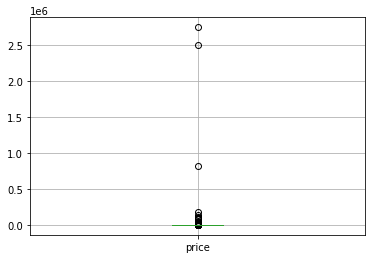

In [ ]:
df.boxplot('price') #green line corresponds to the abovementioned mean

In [ ]:
df_temporary_2 = pd.DataFrame(df['price'].copy())
df_temporary_2

,price
0,172.92
1,204.05
2,121.05
3,34.58
4,172.92
...,...
4358,50.00
4359,20.00
4360,200.00
4361,211.20


In [ ]:
for x in ['price']:
    q75,q25 = np.percentile(df_temporary_2.loc[:,x],[75,25])
    intr_qr = q75-q25
 
    max = q75+(1.5*intr_qr)
    min = q25-(1.5*intr_qr)
 
    df_temporary_2.loc[df_temporary_2[x] < min,x] = np.nan

    df_temporary_2.loc[df_temporary_2[x] > max,x] = np.nan

In [ ]:
round(df_temporary_2['price'].mean(), 2)

78.66

In [ ]:
round(df_temporary_2['price'].median(), 2)

50.0

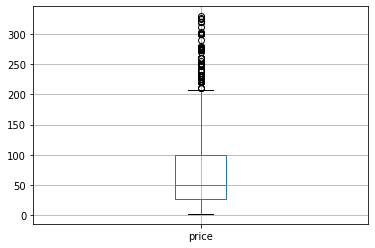

In [ ]:
df_temporary_2.boxplot('price')  #green line corresponds to the median (50.0)

Now we can create 3 price targets based on the mean price as our threshold.

In [ ]:
all_prices = pd.DataFrame(df, columns = ['price'])
all_prices.head()

,price
0,172.92
1,204.05
2,121.05
3,34.58
4,172.92


In [ ]:
price_class = {}
for price in df.price:
  if price < 78.66:
    price_class[price] = 0 #cheap NFTs
  elif price > 210:
    price_class[price] = 2 #luxury NFTs
  else:
    price_class[price] = 1 #average NFTs

In [ ]:
price_class_df = pd.DataFrame(
    [{"price": price, "price_class": price_class} for (price, price_class) in price_class.items()])
price_class_df.head()
len(price_class_df)

,price,price_class
0,172.92,1
1,204.05,1
2,121.05,1
3,34.58,0
4,376.97,2


383

In [ ]:
average_full_1 = (all_prices >= 78.66)
average_full_2 = (all_prices <= 210)
average_full_prep = pd.concat([average_full_1, average_full_2], axis = 1) #axis=1 specifies horizontal stacking
average_nft = pd.DataFrame(average_full_prep.all(axis=1))
average_nft.rename(columns={0:"price"},inplace=True)

cheap_nft = (all_prices < 78.66)

luxury_nft = (all_prices > 210)

In [ ]:
all_labels = pd.concat([cheap_nft, average_nft, luxury_nft], axis = 1)*1 #axis=1 specifies horizontal stacking
all_labels

,price,price,price
0,0,1,0
1,0,1,0
2,0,1,0
3,1,0,0
4,0,1,0
...,...,...,...
4358,1,0,0
4359,1,0,0
4360,0,1,0
4361,0,0,1


In [ ]:
prep_classes = all_labels['price'].sum().reset_index()
prep_classes.rename(columns={0:'NFT_count'},inplace=True)
prep_classes.rename(columns={'index': 'category'}, inplace=True)
prep_classes

,category,NFT_count
0,price,2457
1,price,1166
2,price,740


In [ ]:
price_classes = pd.DataFrame({'categories': ['cheap', 'average', 'luxury'],
                              'NFT_count': [2457, 1166, 740]})
price_classes

,categories,NFT_count
0,cheap,2457
1,average,1166
2,luxury,740


<Figure size 1152x504 with 0 Axes>

Text(0.5, 1.0, 'Number of NFTs in each price class')

Text(0, 0.5, 'Number of NFTs')

Text(0.5, 0, 'Price category')

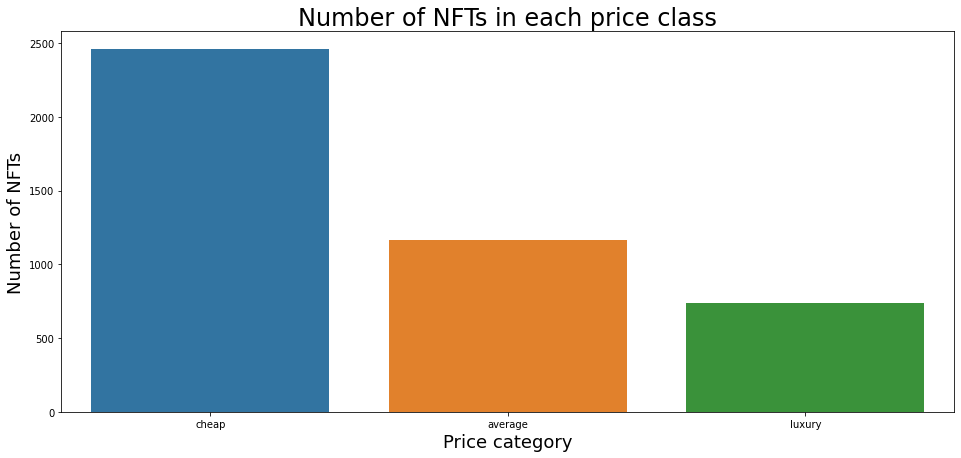

In [ ]:
# Seaborn Visualisation
plt.figure(figsize=(16,7))
ax = sns.barplot(x = 'categories', y = 'NFT_count', data = price_classes)
plt.title('Number of NFTs in each price class', fontsize=24)
plt.ylabel('Number of NFTs', fontsize=18)
plt.xlabel('Price category', fontsize=18)

The figure above reveals 2 things. Firstly, the threshold prices have been split realistically: there is normally an abundance of cheap products and limited supply of luxury ones. However, due to such an uneven number of instances per class, we have an imbalanced classification.

In [ ]:
df = df.merge(price_class_df,how='left', left_on='price', right_on='price')
df.head()
len(df)

,creator,name,art_series,price,likes,artwork_name,collection,artwork_counts,price_class
0,54,99,44,172.92,0.791214,4084,1715,1,1
1,532,190,81,204.05,12.000000,4084,1715,3,1
2,58,104,72,121.05,4.000000,4084,1715,6,1
3,48,222,96,34.58,3.000000,4084,1715,3,0
4,42,74,29,172.92,2.000000,4084,1715,5,1


4363

#### 4.1.2 <a class="anchor" id="4_1_2"></a> Artwork counts per artist

Below, a new variable that tells how many NFTs each artist has was created. NFT price may be strongly correlated to frequency of creator’s final artistic output.

In [ ]:
artwork_counts = {}

for creator in df.creator:
  if creator in artwork_counts:
    artwork_counts[creator] = artwork_counts[creator] + 1
  else:
    artwork_counts[creator] = 1

In [ ]:
artwork_counts_check = df['creator'].value_counts().to_dict()
artwork_counts_check == artwork_counts

True

In [ ]:
df_temporary = pd.DataFrame(
    [{"creator": creator, "artwork_counts": artwork_counts} for (creator, artwork_counts) in artwork_counts.items()])
df_temporary.head()
len(df_temporary)

,creator,artwork_counts
0,54,1
1,532,3
2,58,6
3,48,3
4,42,5


614

In [ ]:
df = df.merge(df_temporary,how='left', left_on='creator', right_on='creator')
df.head()
len(df)

,creator,name,art_series,price,likes,artwork_name,collection,artwork_counts
0,54,99,44,172.92,0.791214,4084,1715,1
1,532,190,81,204.05,12.000000,4084,1715,3
2,58,104,72,121.05,4.000000,4084,1715,6
3,48,222,96,34.58,3.000000,4084,1715,3
4,42,74,29,172.92,2.000000,4084,1715,5


4363

In [ ]:
df.info()

### 4.2 <a class="anchor" id="4_2"></a> Data splitting and scaling

In [ ]:
# Choose a response variable
y = df['price_class']

# Drop a response variable from the feature data set
X = df.drop(columns = 'price_class')

In [ ]:
# Scale the explanatory variables
from sklearn.preprocessing import RobustScaler
df = pd.DataFrame(RobustScaler().fit_transform(X), columns=X.columns)
df

,creator,name,art_series,price,likes,artwork_name,collection,artwork_counts
0,-0.942238,-144.0,-0.917241,0.941000,0.791214,0.888837,0.846866,-0.50000
1,0.783394,-53.0,-0.900230,1.200417,12.000000,0.888837,0.846866,-0.43750
2,-0.927798,-139.0,-0.904368,0.508750,4.000000,0.888837,0.846866,-0.34375
3,-0.963899,-21.0,-0.893333,-0.211833,3.000000,0.888837,0.846866,-0.43750
4,-0.985560,-169.0,-0.924138,0.941000,2.000000,0.888837,0.846866,-0.37500
...,...,...,...,...,...,...,...,...
4358,1.068592,0.0,1.001379,-0.083333,0.000000,0.022696,0.182016,-0.18750
4359,1.068592,0.0,0.999080,-0.333333,0.000000,-0.795276,-0.417439,-0.18750
4360,1.072202,0.0,1.001839,1.166667,0.000000,0.342288,0.635422,-0.50000
4361,1.075812,0.0,1.002759,1.260000,0.000000,-0.724873,0.749864,-0.46875


In [ ]:
# Split data set into train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state=2022, stratify=y)

## Chapter 5: <a class="anchor" id="chapter5"></a> Loading 1: Model training

Let’s consider the nature of the problem more closely. With the new column “price class” generated as a multilabel classification’s target data with a coherent structure, it is a supervised learning task, predicting the best-fitting price class for the rest of the labelled features.

For precision scores, we will use "weighted" for the "average" parameter, which alters "macro" to account for label imbalance.

### 5.1 <a class="anchor" id="5_1"></a> Logistic regression

In [ ]:
#URL: https://www.datacamp.com/community/tutorials/understanding-logistic-regression-python

# Instantiate the model
random.seed(2022)
lr = LogisticRegression()

#Train the model using the training sets
lr.fit(X_train,y_train)

#Predict the response for test dataset
lr_y_pred=lr.predict(X_test)

# Accuracy measures
print("Accuracy score of LR: " + str(round(metrics.accuracy_score(y_test, lr_y_pred), 4)*100)+"%")
print("Precision score of LR: " + str(round(metrics.precision_score(y_test, lr_y_pred, average="weighted", zero_division=1), 4)*100)+"%")
print("Recall score of LR: " + str(round(metrics.recall_score(y_test, lr_y_pred, average="weighted"), 4)*100)+"%")
print("F1 of LR: " + str(round(metrics.f1_score(y_test, lr_y_pred, average="weighted"), 4)*100)+"%")

### 5.2 <a class="anchor" id="5_2"></a> KNeighbors Classifier

In [ ]:
#Create KNN Classifier
random.seed(2022)
knn_3 = KNeighborsClassifier(n_neighbors = 3)

#Train the model using the training sets
knn_3.fit(X_train, y_train)

#Predict the response for test dataset
knn_3_y_pred = knn_3.predict(X_test)

# Accuracy measures
print("Accuracy score of KNN-3: " + str(round(metrics.accuracy_score(y_test, knn_3_y_pred), 4)*100)+"%")
print("Precision score of KNN-3: " + str(round(metrics.precision_score(y_test, knn_3_y_pred, average="weighted", zero_division=1), 4)*100)+"%")
print("Recall score of KNN-3 " + str(round(metrics.recall_score(y_test, knn_3_y_pred, average="weighted"), 4)*100)+"%")
print("F1 of KNN-3: " + str(round(metrics.f1_score(y_test, knn_3_y_pred, average="weighted"), 4)*100)+"%")

KNN performed better than logit. For further evaluation, let’s create a model for a different number of neighbours.

In [ ]:
random.seed(2022)
knn_7 = KNeighborsClassifier(n_neighbors=7)
knn_7.fit(X_train, y_train)
knn_7_y_pred = knn_7.predict(X_test)

print("Accuracy score of KNN-7: " + str(round(metrics.accuracy_score(y_test, knn_7_y_pred), 4)*100)+"%")
print("Precision score of KNN-7: " + str(round(metrics.precision_score(y_test, knn_7_y_pred, average="weighted", zero_division=1), 4)*100)+"%")
print("Recall score of KNN-7 " + str(round(metrics.recall_score(y_test, knn_7_y_pred, average="weighted"), 4)*100)+"%")
print("F1 of KNN-7: " + str(round(metrics.f1_score(y_test, knn_7_y_pred, average="weighted"), 4)*100)+"%")

KNN with 7 neighbours performed 1.19% better than with 3 neighbours, however, with a slightly lower precision score and thus, harmonic mean.

### 5.3 <a class="anchor" id="5_3"></a> Decision tree

In [ ]:
# Create Decision Tree Classifer object
random.seed(2022)
dtc = DecisionTreeClassifier()

# Train Decision Tree Classifer
dtc = dtc.fit(X_train,y_train)

#Predict the response for test dataset
dtc_y_pred = dtc.predict(X_test)

# Accuracy measures
print("Accuracy score of DTC: " + str(round(metrics.accuracy_score(y_test, dtc_y_pred), 4)*100)+"%")
print("Precision score of DTC: " + str(round(metrics.precision_score(y_test, dtc_y_pred, average="weighted", zero_division=1), 4)*100)+"%")
print("Recall score of DTC: " + str(round(metrics.recall_score(y_test, dtc_y_pred, average="weighted"), 4)*100)+"%")
print("F1 of DTC: " + str(round(metrics.f1_score(y_test, dtc_y_pred, average="weighted"), 4)*100)+"%")

### 5.4 <a class="anchor" id="5_4"></a> Random forest classifier

In [ ]:
#Create a Gaussian Classifier
random.seed(2022)
rfc = RandomForestClassifier(random_state = 2022)

#Train the model using the training sets y_pred=clf.predict(X_test)
rfc.fit(X_train,y_train)

# prediction on test set
rfc_y_pred=rfc.predict(X_test)

# Accuracy measures
print("Accuracy score of RFC: " + str(round(metrics.accuracy_score(y_test, rfc_y_pred), 4)*100)+"%")
print("Precision score of RFC: " + str(round(metrics.precision_score(y_test, rfc_y_pred, average="weighted", zero_division=1), 4)*100)+"%")
print("Recall score of RFC: " + str(round(metrics.recall_score(y_test, rfc_y_pred, average="weighted"), 4)*100)+"%")
print("F1 of RFC: " + str(round(metrics.f1_score(y_test, rfc_y_pred, average="weighted"), 4)*100)+"%")

### 5.5 <a class="anchor" id="5_5"></a> XGBoost

In [ ]:
#Create a XGBoost model
random.seed(2022)
xgb = XGBClassifier(n_estimators=100, learning_rate=0.05, booster='gbtree', random_state = 2022)

#Train the model using the training sets y_pred=clf.predict(X_test)
xgb.fit(X_train,y_train)

# Prediction on test set
xgb_y_pred=xgb.predict(X_test)

# Accuracy measures
print("Accuracy score of XGB: " + str(round(metrics.accuracy_score(y_test, xgb_y_pred), 4)*100)+"%")
print("Precision score of XGB: " + str(round(metrics.precision_score(y_test, xgb_y_pred, average="weighted", zero_division=1), 4)*100)+"%")
print("Recall score of XGB: " + str(round(metrics.recall_score(y_test, xgb_y_pred, average="weighted"), 4)*100)+"%")
print("F1 of XGB: " + str(round(metrics.f1_score(y_test, xgb_y_pred, average="weighted"), 4)*100)+"%")

### 5.6 <a class="anchor" id="5_6"></a> Stacking

In [ ]:
#URL: https://machinelearningmastery.com/stacking-ensemble-machine-learning-with-python/

# get a stacking ensemble of models
def get_stacking():
	# define the base models
	level0 = list()
	level0.append(('lr', LogisticRegression()))
	level0.append(('knn', KNeighborsClassifier()))
	level0.append(('dtc', DecisionTreeClassifier()))
	level0.append(('rfc', rfc_tuned))
	level0.append(('xgb', XGBClassifier()))
	level0.append(('gnb', GaussianNB()))

	# define meta learner model
	level1 = rfc_tuned
	# define the stacking ensemble
	model = StackingClassifier(estimators=level0, final_estimator=level1, cv=5)
	return model

# get a list of models to evaluate
def get_models():
	models = dict()
	models['lr'] = LogisticRegression()
	models['knn'] = KNeighborsClassifier()
	models['dtc'] = DecisionTreeClassifier()
	models['rfc'] = rfc_tuned
	models['xgb'] = XGBClassifier()
	models['gnb'] = GaussianNB()
	models['stacking'] = get_stacking()
	return models

# evaluate a given model using cross-validation
def evaluate_model(model, X, y):
	cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
	scores = cross_val_score(model, X, y, scoring='accuracy', cv=cv, n_jobs=-1, error_score='raise')
	return scores

# get the models to evaluate
models = get_models()
# evaluate the models and store results
results, names = list(), list()
for name, model in models.items():
	scores = evaluate_model(model, X, y)
	results.append(scores)
	names.append(name)
	print('>%s %.3f (%.3f)' % (name, mean(scores), std(scores)))
# plot model performance for comparison
pyplot.boxplot(results, labels=names, showmeans=True)
pyplot.show()

In [ ]:
# define the base models
level0 = list()
level0.append(('rfc', rfc_tuned))
level0.append(('xgb', XGBClassifier()))

# define meta learner model
level1 = rfc_tuned

# define the stacking ensemble
model = StackingClassifier(estimators=level0, final_estimator=level1, cv=5)

# fit the model on all available data
model.fit(X, y)

# make a prediction for one example
random_NFT = X.sample(n=1)
yhat = model.predict(random_NFT)
print('Predicted Class: %d' % (yhat))

### 5.7 <a class="anchor" id="5_7"></a> Voting classifier

In [ ]:
from sklearn.ensemble import VotingClassifier

rfc = rfc_tuned
dtc = DecisionTreeClassifier()
xgb = XGBClassifier()

voting_clf = VotingClassifier(
    estimators=[('rfc', rfc_tuned), ('dtc', dtc), ('xgb', xgb)],
    voting='hard')
voting_clf.fit(X_train, y_train)

In [ ]:
from sklearn.metrics import accuracy_score
for clf in (rfc_tuned, dtc, xgb, voting_clf):
  clf.fit(X_train, y_train)
  y_pred = clf.predict(X_test)
  print(clf.__class__.__name__, accuracy_score(y_test, y_pred))

### 5.8 <a class="anchor" id="5_8"></a> Feture importance

In [ ]:
feature_imp = pd.Series(rfc_tuned.feature_importances_, index=X.columns).sort_values(ascending=False)
feature_imp

In [ ]:
# Create a new DataFrame for feature importance
rfc_tuned.feature_names = normal_df.drop("price", axis = 1).columns
rfc_tuned_feature_importance = pd.DataFrame({"Feature": rfc_tuned.feature_names,"Importance":rfc_tuned.feature_importances_})
rfc_tuned_feature_importance = rfc_tuned_feature_importance.sort_values(by = ["Importance"], ascending = False)

In [ ]:
# Plotting a bar plot for feature importance
%matplotlib inline

plt.figure(figsize = (14,7))
sns.barplot(rfc_tuned_feature_importance["Feature"], rfc_tuned_feature_importance["Importance"], color = "navy")
plt.title("Feature Importance")
plt.xlabel("Features")
plt.ylabel("Feature Importance Score")
plt.xticks(rotation = "vertical")
plt.legend()
plt.show()

In [ ]:
# Generating the model on all features

X = full_df[['year', 'artwork_counts', 'tokens',
             'media', 'collection',  'rights',
             'creator', 'art_series', 'artwork_name', 'likes', 'nsfw']]
y = full_df['price_class']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=2022)

random.seed(2022)
rfc_tuned.fit(X_train,y_train)
y_pred=rfc_tuned.predict(X_test)
print('Accuracy of RFC with all features is ' + str(round(metrics.accuracy_score(y_test, y_pred), 3)*100)+'%')

In [ ]:
# 1 feature dropped
X = full_df[['year', 'artwork_counts', 'tokens',
             'media', 'collection',  'rights',
             'creator', 'art_series', 'artwork_name', 'likes']]
y = full_df['price_class']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=2022)

rfc_tuned.fit(X_train,y_train)
y_pred=rfc_tuned.predict(X_test)
print('Accuracy of tuned RFC with 1 feature dropped is ' + str(round(metrics.accuracy_score(y_test, y_pred), 3)*100)+'%')

Dropping even 1 feature made model's accuracy lower, causing diminishing returns. Hence, we're going to keep all of them, rerunning the penultimate cell, as it seems to maximise the accuracy.

## Chapter 6: <a class="anchor" id="chapter6"></a> Loading 2: RDBMS

### 6.1 <a class="anchor" id="6_1"></a> Creating schema

### 6.2 <a class="anchor" id="6_2"></a> Storage

 Good use data storage formats
– e.g. Avaro / Parquet etc.

## Chapter 7: <a class="anchor" id="chapter7"></a> Final pipeline testing

## Chapter 8: <a class="anchor" id="chapter8"></a> Consclusion

## Chapter 9: <a class="anchor" id="chapter9"></a> References

De Haan, A. (2021). NFT Art Collection 2021. [online] www.kaggle.com. Available at: https://www.kaggle.com/datasets/vepnar/nft-art-dataset [Accessed 29 Mar. 2022].

Martinique, E. (2021). 12 NFT Marketplaces To Be Familiar With Right Now. [online] Widewalls. Available at: https://www.widewalls.ch/magazine/nft-marketplaces/niftygateway [Accessed 14 Mar. 2022].

OpenSea (n.d.). OpenSea: Buy NFTs, Crypto Collectibles, CryptoKitties, Decentraland, and More on Ethereum. [online] OpenSea. Available at: https://opensea.io [Accessed 29 Mar. 2022].

‌

## Chapter 10: <a class="anchor" id="chapter10"></a> Appendix

### 10.1 <a class="anchor" id="10_1"></a> Project management

Use of Data Lineage for tracking data origins and any transformations applied.

Individual tasks:
0) Project setup and administration (2)
1) Web scrapping (1)
2) Creating a schema (1)
3) Impute the relational database with existing data (1)
=2) Data cleaning to mirror the existing dataset (2)
=3) Data processing to mirror the existing dataset (2)
4) Impute the relational database with new data (2)
5) Initialise schema on a cloud platform with repeatable environment (2)
6) Scaling (2)
=6) Model training without fine-tuning (1)
7) Ensemble learning (1)
8) File storage HDFS/Parquet/ORC (1)
9) Write up the 1st half of the report (1)
10) Write up the 2nd half of the report (2)

### 10.2 <a class="anchor" id="10_2"></a> Word count